In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_excel("Assignment_Dataset.xlsx")
print(df.head()) 

        Date       GHI         PR
0 2019-07-01  3.256608  69.575676
1 2019-07-02  3.976767  79.314411
2 2019-07-03  2.811867  61.020006
3 2019-07-04  3.658408  83.262576
4 2019-07-05  5.590683  82.124440


In [3]:
# Calculate moving average of PR for 30 days
df['PR_30d_MA'] = df['PR'].rolling(window=30).mean()

In [4]:
pd.isnull(df).sum()

Date          0
GHI           0
PR            0
PR_30d_MA    29
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,Date,GHI,PR,PR_30d_MA
count,953,953.000000,953.000000,953.000000
mean,2020-11-22 13:34:26.316893952,4.632240,72.722838,72.708077
min,2019-07-30 00:00:00,1.413825,60.023886,68.801942
25%,2020-03-24 00:00:00,4.023817,66.264122,72.038246
50%,2020-11-17 00:00:00,4.747467,72.933442,72.875993
75%,2021-07-29 00:00:00,5.292800,79.130196,73.515255
max,2022-03-24 00:00:00,6.947317,84.980120,76.533258
std,NaN,1.002799,7.320136,1.313884


In [7]:
pd.isnull(df).sum()

Date         0
GHI          0
PR           0
PR_30d_MA    0
dtype: int64

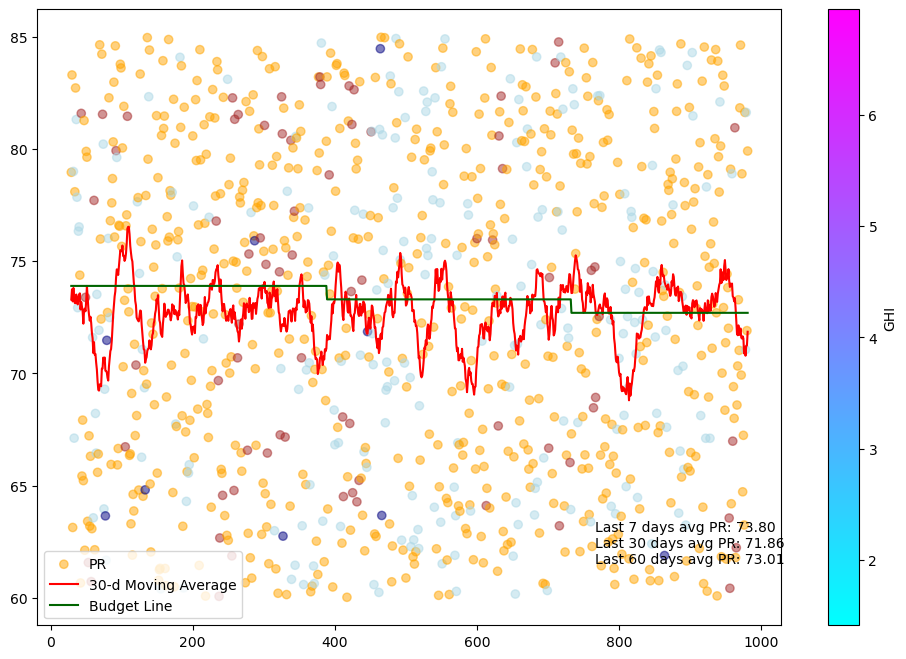

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate target budget PR dynamically
start_date = df['Date'].min()
df['Year'] = df['Date'].dt.year
df['Months_since_start'] = (df['Date'] - start_date).dt.days // 30
df['Budget_PR'] = 73.9 - 0.6 * (df['Months_since_start'] // 12)

# Define colors based on GHI
def get_color(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

# Scatter plot for PR
sc = ax.scatter(df.index, df['PR'], c=df['GHI'].apply(get_color), label='PR', alpha=0.5)

# 30-d moving average
ax.plot(df.index, df['PR_30d_MA'], color='red', label='30-d Moving Average')

# Budget line
ax.plot(df.index, df['Budget_PR'], color='darkgreen', label='Budget Line')

# Colorbar
norm = Normalize(vmin=df['GHI'].min(), vmax=df['GHI'].max())
sm = ScalarMappable(cmap='cool', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('GHI')

# Legend
ax.legend()

# Text for average PR
avg_last_7_days = df['PR'].rolling(window=7).mean().iloc[-1]
avg_last_30_days = df['PR'].rolling(window=30).mean().iloc[-1]
avg_last_60_days = df['PR'].rolling(window=60).mean().iloc[-1]
ax.text(0.75, 0.1, f'Last 7 days avg PR: {avg_last_7_days:.2f}\nLast 30 days avg PR: {avg_last_30_days:.2f}\nLast 60 days avg PR: {avg_last_60_days:.2f}', transform=ax.transAxes)

plt.show()